# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Обзор данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,  confusion_matrix,  roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# сделаем так, чтобы jupyter не выдавал ошибки
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Churn.csv')
display(data.info())
display(data.head(10))
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В таблице содержатся данные о поведении клиентов банка. Согласно документации:
#### Признаки

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

#### Целевой признак

* Exited — факт ухода клиента

Все столбцы приведем к нижнему и змеиному регистру - так удобнее работать. 

In [5]:
data = data.rename(
    columns={
        'RowNumber':'row_number',
        'CustomerId': 'customer_id',
        'CreditScore':'credit_score',
        'NumOfProducts':'num_of_products',
        'HasCrCard':'has_cr_card',
        'IsActiveMember':'is_active_member',
        'EstimatedSalary':'estimated_salary'
    }
)
data.columns = data.columns.str.lower()
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

В таблице есть столбцы с данными, которые не несут полезной информации - удалим их. 

In [6]:
data.drop(["row_number", "customer_id", "surname"], axis=1, inplace=True)
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим доли значений целевого признака.

In [7]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Видим, что количество ушедших клиентов составляет 1/5 от общего количества. Дугими словами, доля объектов положительного класса равняется ~1/5, отрицательного - ~4/5. 

In [8]:
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [9]:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

### Пропуски

In [10]:
data.isna().sum()

credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [11]:
tenure_median = data['tenure'].median()

In [12]:
data['tenure'] = data['tenure'].fillna(tenure_median)
data.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

### One hot encoding

Так как у нас имеются категориальные признаки, применим кодирование one hot encoding для работы со столбцами **gender**, **geography**, помня о дамми-ловушке. 

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Деление данных на выборки

Поделим данные на обучащую, валидационную и тестовую выборки в масштабе 3:1:1. 

In [14]:
# посмротрим размер таблицы
data_ohe.shape

(10000, 12)

In [15]:
# определим признаки и целевой признак
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                    target,
                                                    test_size=0.4,
                                                    random_state=12345)                                                    

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
                                                    target_valid,
                                                    test_size=0.5,
                                                    random_state=12345)                                                    

In [18]:
features_targets = [features_train, target_train, features_valid, target_valid, features_test, target_test]

for var in features_targets:
    display(var.shape)

(6000, 11)

(6000,)

(2000, 11)

(2000,)

(2000, 11)

(2000,)

Деление прошло успешно. 

### Масштабирование

В данных присутствуют колличественные признаки с разными разбросами значений,а именно в столбцах **balance** и **estimated_salary**. Алгорим может решить, что большие значения и разброс важнее. Чтобы избежать этой ловушки, приведем признаки к одному масштабу.

In [19]:
numeric = ['balance', 'estimated_salary']

In [20]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [21]:
display(features_train.head())
display(features_valid.head())
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8.0,1.232271,1,1,0,-0.187705,0,1,1
3411,711,37,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,850,44,3.0,1.027098,2,0,1,1.503095,1,0,1
1247,512,24,6.0,-1.233163,2,1,0,-1.071061,0,0,1
3716,665,27,2.0,1.140475,1,0,0,1.524268,1,0,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,585,35,2.0,-1.233163,2,1,0,-0.015173,0,0,0
5799,625,45,3.0,-1.233163,1,1,1,1.471724,0,0,0
5511,667,32,0.0,0.438711,1,1,0,-1.367107,1,0,1
7365,568,36,10.0,1.239884,1,1,1,-0.786517,0,1,0
7367,606,42,10.0,-1.233163,2,1,0,1.358533,0,1,1


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,438,38,2.0,-1.233163,2,1,0,0.647083,0,0,1
5709,644,39,9.0,-1.233163,1,1,0,-1.658410,0,0,0
7117,564,31,5.0,0.722307,1,1,1,-1.369334,0,1,1
7775,628,40,10.0,-1.233163,2,1,0,0.075086,0,1,1
8735,728,30,10.0,0.615625,1,0,1,-1.070919,0,0,1


##### Вывод

Мы проделали необходимые операции по подготовке данных, теперь можем двигаться к решению задачи. 

## Исследование задачи

### Обучение моделей

Для исследования задачи будем обучать несколько моделей: "дерево решений", "случайный лес" и "логистическую регрессию".

#### Дерево решений

In [22]:
model_dtc = DecisionTreeClassifier(random_state=12345)
model_dtc.fit(features_train, target_train)
predictions_dtc = model_dtc.predict(features_valid)
accuracy_dtc = accuracy_score(target_valid, predictions_dtc)
f1_dtc = f1_score(target_valid, predictions_dtc)
print("Accuracy дерева решений:", accuracy_dtc, ', F1 мера:', f1_dtc)

Accuracy дерева решений: 0.795 , F1 мера: 0.5036319612590799


In [23]:
# смена гипермпараметров в цикле
best_model = None
best_result = 0

for depth in range(1, 6):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dtc.fit(features_train, target_train) 
    predictions_dtc = model_dtc.predict(features_valid) 
    result_dtc = accuracy_score(target_valid, predictions_dtc)
    f1_dtc = f1_score(target_valid, predictions_dtc)
    if result_dtc > best_result:
        max_depth = depth
        best_model = model_dtc
        best_result = result_dtc
        best_f1 = f1_dtc
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result, ", максимальная глубина =", max_depth, ', F1 мера:', best_f1)        

Accuracy наилучшей модели на валидационной выборке: 0.853 , максимальная глубина = 5 , F1 мера: 0.5406249999999999


#### Случайный лес

In [24]:
model_rfc = RandomForestClassifier(random_state=12345) 
model_rfc.fit(features_train, target_train)
predictions_rfc = model_rfc.predict(features_valid)
accuracy_rfc = accuracy_score(target_valid, predictions_rfc)
f1_rfc = f1_score(target_valid, predictions_rfc)
print("Accuracy случайного леса:", accuracy_rfc, ', F1 мера:', f1_rfc)

Accuracy случайного леса: 0.858 , F1 мера: 0.5748502994011976


In [25]:
# смена гипермпараметров в цикле
best_model = None
best_result = 0
for est in range(1, 11):
    model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model_rfc.fit(features_train, target_train) 
    predictions_rfc = model_rfc.predict(features_valid) 
    result_rfc = accuracy_score(target_valid, predictions_rfc)
    f1_rfc = f1_score(target_valid, predictions_rfc)
    if result_rfc > best_result:
        max_est = est
        best_model = model_rfc 
        best_result = result_rfc
        best_f1 = f1_rfc

print("Accuracy наилучшей модели на валидационной выборке:", best_result, ", количество наблюдателей =", max_est, ', F1 мера:', best_f1)

Accuracy наилучшей модели на валидационной выборке: 0.85 , количество наблюдателей = 10 , F1 мера: 0.5522388059701492


#### Логистическая регрессия 

In [26]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_valid)
accuracy_lr = accuracy_score(target_valid, predictions_lr)
f1_lr = f1_score(target_valid, predictions_lr)
print("Accuracy логистической регрессии:", accuracy_lr, ', F1 мера:', f1_lr)

Accuracy логистической регрессии: 0.8025 , F1 мера: 0.3316412859560068


In [27]:
# смена гипермпараметров в цикле
best_model = None
best_result = 0
for iters in range(100, 1000, 100):
    model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iters)
    model_lr.fit(features_train, target_train) 
    predictions_lr = model_lr.predict(features_valid) 
    result_lr = accuracy_score(target_valid, predictions_lr)
    f1_lr = f1_score(target_valid, predictions_lr)
    if result_lr > best_result:
        max_iter = iters
        best_model = model_lr 
        best_result = result_lr
        best_f1 = f1_lr

print("Accuracy наилучшей модели на валидационной выборке:", best_result, ", количество итераций =", max_iter, ', F1 мера:', best_f1)

Accuracy наилучшей модели на валидационной выборке: 0.8025 , количество итераций = 100 , F1 мера: 0.3316412859560068


Как видим, лучшей моделью среди всех оказалось "дерево решений" с максимальной глубиной **5**. Она показала самые высокие значения метрик accuracy и F1. Для дальнейшего исследования будем использовать ее. Поверим модель на адекватность. 

### Проверка модели на адекватность

Посмотрим на частоту распределений. 

0    0.7963
1    0.2037
Name: exited, dtype: float64


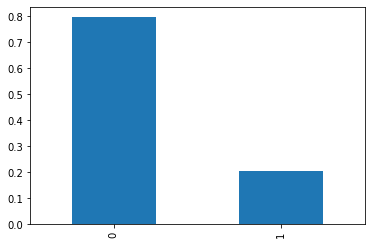

In [28]:
class_frequency = data_ohe['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Далее создадим констатную модель, которая всегда будет предсказывать одно и то же число. 

In [29]:
target_pred_constant = pd.Series([0]*len(target_valid))
acc_constant = accuracy_score(target_pred_constant, target_valid)
print("Accuracy константной модели -", acc_constant)

Accuracy константной модели - 0.791


Проверим через классификатор DummyClassififer. 

In [30]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_valid, target_valid)
DummyClassifier(strategy='most_frequent')
dummy_pred = dummy_clf.predict(features_valid)
acc_dummy = dummy_clf.score(features_valid, target_valid)
print("Accuracy классификатора -", acc_dummy)

Accuracy классификатора - 0.791


Доля правильных ответов модели "дерево решений" оказалась выше, чем у константой и дамми-классификатора, что означает наличие предсказательной силы. Проверка на адекватность пройдена. 

### Матрица ошибок

Построим матрицу ошибок для модели "дерево решений". 

In [31]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)
print("Accuracy дерева решений:", accuracy, ', F1 мера:', f1)

Accuracy дерева решений: 0.853 , F1 мера: 0.5406249999999999


In [32]:
print(confusion_matrix(target_valid, predictions_valid))

[[1533   49]
 [ 245  173]]


##### Вывод

Как мы можем наблюдать, на матрице ошибок наблюдается сильный дисбаланс классов: **истинно отрицательных** ответов 1553, **истинно положительных** - 173. **Ложноположительных** - 49, **ложноотрицательных** - 245. В нашей задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении "дерева решений". В следующем шаге сбалансируем классы и заново обучим модели. 

## Борьба с дисбалансом

### Взвешивание классов

Придадим объектам редкого класса больший вес, чтобы моделям проще запомнить объекты редкого класса.

In [33]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model_dtc.fit(features_train, target_train)
predictions_dtc = model_dtc.predict(features_valid)
accuracy_dtc = accuracy_score(target_valid, predictions_dtc)
f1_dtc = f1_score(target_valid, predictions_dtc)
print("Accuracy дерева решений:", accuracy_dtc, ', F1 мера:', f1_dtc)

Accuracy дерева решений: 0.8105 , F1 мера: 0.5963791267305644


In [34]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=2, class_weight='balanced') 
model_rfc.fit(features_train, target_train)
predictions_rfc = model_rfc.predict(features_valid)
accuracy_rfc = accuracy_score(target_valid, predictions_rfc)
f1_rfc = f1_score(target_valid, predictions_rfc)
print("Accuracy случайного леса:", accuracy_rfc, ', F1 мера:', f1_rfc)

Accuracy случайного леса: 0.8205 , F1 мера: 0.41626016260162596


In [35]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100, class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_valid)
accuracy_lr = accuracy_score(target_valid, predictions_lr)
f1_lr = f1_score(target_valid, predictions_lr)
print("Accuracy логистической регрессии:", accuracy_lr, ', F1 мера:', f1_lr)

Accuracy логистической регрессии: 0.701 , F1 мера: 0.488013698630137


##### Вывод

Взвешивание классов дало следующие результаты: лучшей снова оказалась модель "дерево решений" - целевая метрика `F1` увеличилась с 0.54 до **0.59**. "Случайный лес", напротив, выдал пониженный результат F1 метрики -  с 0.45 до 0.41."Логистическая регрессия" сильно улучшила показатели с 0.33 до **0.48**. Интересно, что `accuracy` "решающего дерева" упала с 0.85 до **0.81**.

### Увеличение выборки

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [37]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

In [38]:
model_dtc_ups = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model_dtc_ups.fit(features_upsampled, target_upsampled)
predictions_dtc_ups = model_dtc_ups.predict(features_valid)
accuracy_dtc_ups = accuracy_score(target_valid, predictions_dtc_ups)
f1_dtc_ups = f1_score(target_valid, predictions_dtc_ups)
print("Accuracy дерева решений:", accuracy_dtc_ups, ', F1 мера:', f1_dtc_ups)

Accuracy дерева решений: 0.8105 , F1 мера: 0.5963791267305644


In [39]:
model_rfc_ups = RandomForestClassifier(random_state=12345, n_estimators=2, class_weight='balanced') 
model_rfc_ups.fit(features_upsampled, target_upsampled)
predictions_rfc_ups = model_rfc_ups.predict(features_valid)
accuracy_rfc_ups = accuracy_score(target_valid, predictions_rfc_ups)
f1_rfc_ups = f1_score(target_valid, predictions_rfc_ups)
print("Accuracy случайного леса:", accuracy_rfc_ups, ', F1 мера:', f1_rfc_ups)

Accuracy случайного леса: 0.8275 , F1 мера: 0.4963503649635037


In [40]:
model_lr_ups = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100, class_weight='balanced')
model_lr_ups.fit(features_upsampled, target_upsampled)
predictions_lr_ups = model_lr_ups.predict(features_valid)
accuracy_lr_ups = accuracy_score(target_valid, predictions_lr_ups)
f1_lr_ups = f1_score(target_valid, predictions_lr_ups)
print("Accuracy логистической регрессии:", accuracy_lr_ups, ', F1 мера:', f1_lr_ups)

Accuracy логистической регрессии: 0.702 , F1 мера: 0.4888507718696398


##### Вывод

Увеличение выборки не принесло особых изменений, кроме увелечения `F1` меры у "случайного леса". Было замечено, что с увеличением повторений **repeat** значение метрики у названой модели повышается. 

### Уменьшение выборки

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [42]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.77)

In [43]:
model_dtc_dwns = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model_dtc_dwns.fit(features_downsampled, target_downsampled)
predictions_dtc_dwns = model_dtc_dwns.predict(features_valid)
accuracy_dtc_dwns = accuracy_score(target_valid, predictions_dtc_dwns)
f1_dtc_dwns = f1_score(target_valid, predictions_dtc_dwns)
print("Accuracy дерева решений:", accuracy_dtc_dwns, ', F1 мера:', f1_dtc_dwns)

Accuracy дерева решений: 0.822 , F1 мера: 0.5898617511520737


In [44]:
model_rfc_dwns = RandomForestClassifier(random_state=12345, n_estimators=2, class_weight='balanced') 
model_rfc_dwns.fit(features_downsampled, target_downsampled)
predictions_rfc_dwns = model_rfc_dwns.predict(features_valid)
accuracy_rfc_dwns = accuracy_score(target_valid, predictions_rfc_dwns)
f1_rfc_dwns = f1_score(target_valid, predictions_rfc_dwns)
print("Accuracy случайного леса:", accuracy_rfc_dwns, ', F1 мера:', f1_rfc_dwns)

Accuracy случайного леса: 0.8275 , F1 мера: 0.4617784711388456


In [45]:
model_lr_dwns = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100, class_weight='balanced')
model_lr_dwns.fit(features_downsampled, target_downsampled)
predictions_lr_dwns = model_lr_dwns.predict(features_valid)
accuracy_lr_dwns = accuracy_score(target_valid, predictions_lr_dwns)
f1_lr_dwns = f1_score(target_valid, predictions_lr_dwns)
print("Accuracy логистической регрессии:", accuracy_lr_dwns, ', F1 мера:', f1_lr_dwns)

Accuracy логистической регрессии: 0.7 , F1 мера: 0.4863013698630136


##### Вывод

С уменьшением выборки качество `F1` метрики снизилось как и "дерева решений", так и у "логистической регрессии". Результаты "случайного леса" снова поднялись. 

### Изменение порога

Для "логистической регрессии" изменим порог и посмотрим, как это повлияет на результаты. 

In [46]:
model_lr_proba = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100, class_weight='balanced')
model_lr_proba.fit(features_train, target_train)
probabilities_valid = model_lr_proba.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.9, 0.02):
    predicted_valid = probabilities_one_valid > threshold  
    f1_proba = f1_score(target_valid, predicted_valid)
    accuracy_proba = accuracy_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Accuracy = {:.3f}, F1 = {:.3f}".format(
        threshold, accuracy_proba, f1_proba))

Порог = 0.00 | Accuracy = 0.209, F1 = 0.346
Порог = 0.02 | Accuracy = 0.209, F1 = 0.346
Порог = 0.04 | Accuracy = 0.209, F1 = 0.346
Порог = 0.06 | Accuracy = 0.214, F1 = 0.347
Порог = 0.08 | Accuracy = 0.222, F1 = 0.349
Порог = 0.10 | Accuracy = 0.237, F1 = 0.354
Порог = 0.12 | Accuracy = 0.256, F1 = 0.359
Порог = 0.14 | Accuracy = 0.285, F1 = 0.367
Порог = 0.16 | Accuracy = 0.309, F1 = 0.374
Порог = 0.18 | Accuracy = 0.332, F1 = 0.380
Порог = 0.20 | Accuracy = 0.354, F1 = 0.386
Порог = 0.22 | Accuracy = 0.391, F1 = 0.396
Порог = 0.24 | Accuracy = 0.411, F1 = 0.401
Порог = 0.26 | Accuracy = 0.433, F1 = 0.407
Порог = 0.28 | Accuracy = 0.458, F1 = 0.413
Порог = 0.30 | Accuracy = 0.482, F1 = 0.422
Порог = 0.32 | Accuracy = 0.505, F1 = 0.428
Порог = 0.34 | Accuracy = 0.532, F1 = 0.439
Порог = 0.36 | Accuracy = 0.562, F1 = 0.452
Порог = 0.38 | Accuracy = 0.594, F1 = 0.465
Порог = 0.40 | Accuracy = 0.615, F1 = 0.472
Порог = 0.42 | Accuracy = 0.631, F1 = 0.473
Порог = 0.44 | Accuracy = 0.655,

##### Вывод

Изменение порога показало следующее: `F1` метрика росла до значения порога 0.54 и достигла максимума - 0.5, после чего снижалась обратно пропорционально росту порога. 

### ROC кривая

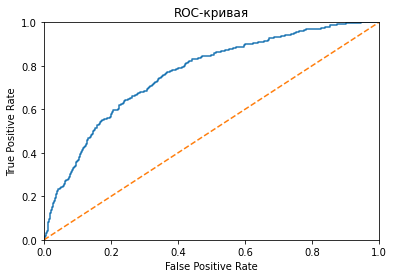

In [47]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

##### Вывод

График показал, что качество модели можно считать высоким. 

### AUC-ROC метрика

In [48]:
roc_auc_score(target_valid, probabilities_one_valid)

0.7632274572190735

##### Вывод

Модель отличается от случайной на 0.26 пункта на основе метрики `AUC-ROC`. В задаче бинарной классификации это говорит о хорошем качестве. 

#### Вывод по борьбе с дисбалансом 

Использовав разные инструменты борьбы с дисбалансом, мы выявили, что "дерево решений" до сих пор остается самой эффективной моделью. Применим ее на тестовой выборке, оставив максимальную глубину со значением 5 и сбалансированность классов.

## Тестирование модели

Объеденим валидационную и тестовую выборки, так как были подобраны подходящие гиперпараметры. Тестовая выборка будет больше, что улучшит показания финальных метрик. 

In [49]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                    target,
                                                    test_size=0.4,
                                                    random_state=12345)  

In [50]:
model_test = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model_test.fit(features_downsampled, target_downsampled)
predictions_test = model_test.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
f1_test = f1_score(target_test, predictions_test)
print("Accuracy дерева решений:", accuracy_test, ', F1 мера:', f1_test)

Accuracy дерева решений: 0.822 , F1 мера: 0.600896860986547


##### Вывод

Применив уменьшение выборки, устновив максимальную глубину в 5 и сбалансировав классы, мы смогли достичь значения `F1` метрики **0.6**. Ткаким образом была решена поставленная задача по написанию модели, прогнузирующей отток клиентов. 